In [2]:
# Import necessary libraries
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
data_dir = '/content/drive/MyDrive/Dataset_ML'
img_height, img_width = 64, 64



In [5]:
images = []
labels = []


In [6]:
for label in os.listdir(data_dir):
    shot_dir = os.path.join(data_dir, label)
    if os.path.isdir(shot_dir):
        for img_name in os.listdir(shot_dir):
            img_path = os.path.join(shot_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_height, img_width))
            img = img / 255.0
            images.append(img)
            labels.append(label)

In [7]:
images = np.array(images)
labels = np.array(labels)


In [8]:
# Reshape images for Random Forest (flatten each image to 1D array)
X = images.reshape(images.shape[0], -1)
y = labels

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")


Random Forest Accuracy: 0.7407407407407407


In [13]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)


In [14]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



Classification Report:
                    precision    recall  f1-score   support

       0. Cut Shot       0.76      0.69      0.73       150
    1. Cover Drive       0.71      0.72      0.71       123
 2. Straight Drive       0.72      0.70      0.71       127
      3. Pull Shot       0.71      0.72      0.72       109
4. Leg Glance Shot       0.82      0.80      0.81       114
     5. Scoop Shot       0.72      0.84      0.77       106

          accuracy                           0.74       729
         macro avg       0.74      0.75      0.74       729
      weighted avg       0.74      0.74      0.74       729



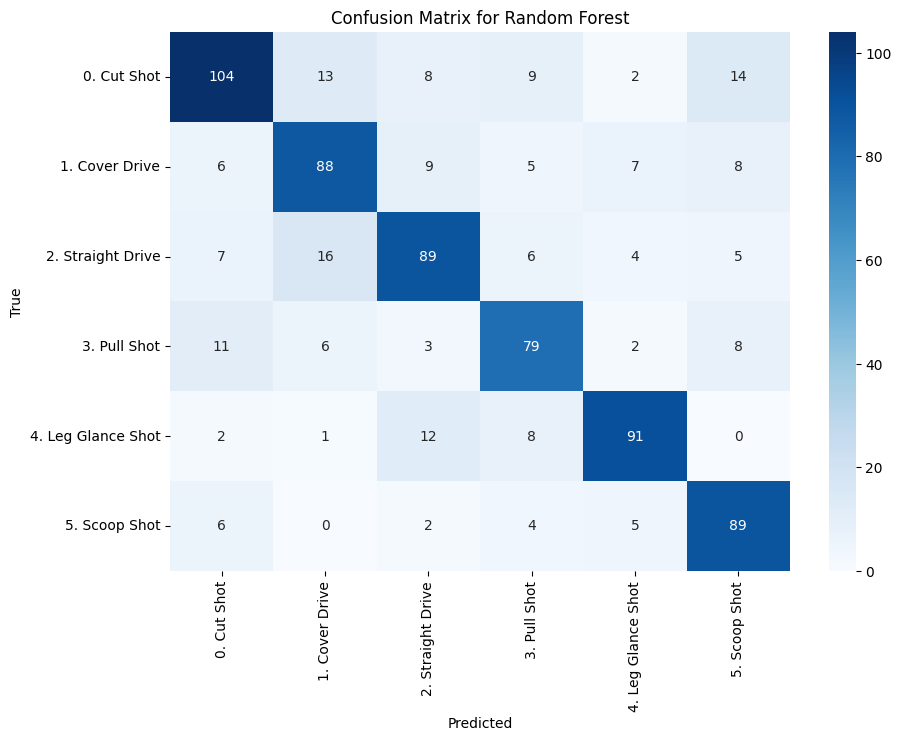

['cricket_shot_rf_model.pkl']

In [15]:

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Save the model
import joblib
joblib.dump(rf_model, 'cricket_shot_rf_model.pkl')

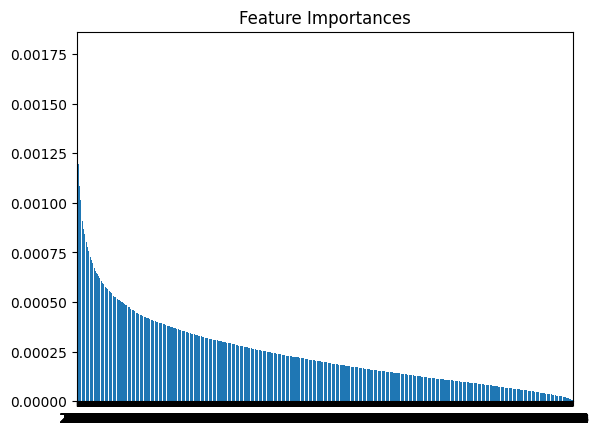

In [21]:
# Assuming your Random Forest model is named `rf_model`
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Train the model on the training data

# Feature importances
importances = rf_model.feature_importances_

# Plotting feature importances
import matplotlib.pyplot as plt
import numpy as np

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()
